# Set up

In [1]:
import numpy as np
import scipy.constants as cc

from tabulate import tabulate

import matplotlib.pyplot as plt
from importlib import reload
# from matplotlib import ticker

from RashbaJunction import RashbaJunction2
from RashbaJunction.utilities import adjuct_Tick, renormallize_result, make_grid
from RashbaJunction.ScatteringMatrix import ScatteringMatrix

ev_to_j = 1.602176634e-19

hbar = 6.582119569e-16
m = 0.015*cc.m_e
h_xy = 0.1e-3*ev_to_j# mJ

# k_z = np.sqrt(2*m*h_xy/ev_to_j)/hbar
k_z = np.sqrt(2*m*h_xy)/cc.hbar# 1/Metr


x = 500e-9# Metr
x_prime =  k_z*x# adimensional
print(f"k_so {k_z}")
print(f"x' {x_prime}")

BASE_PATH = "plots/paper_plots_2/"
# BASE_PATH_DIRAC_PARADOX = "plots/tesi/4_Dirac_paradox/"
# BASE_PATH_SLIDE = "plots/tesi/Slide/"
# BASE_PATH_SLIDE = "/Users/l/Google Drive/polito_/tesi/Text/vesions/Slide/assets/"

print(BASE_PATH)
# print(BASE_PATH_DIRAC_PARADOX)
# print(BASE_PATH_SLIDE)

k_so 6274572.777578376
x' 3.137286388789188
plots/paper_plots_2/


In [2]:
font = {'family': "Times New Roman", "size": 25}

# y_label = [r"$$\frac{2 \pi \hbar}{q^2} G$$", r"$$-\frac{6 \hbar}{q \pi k_b^2 T}L$$"]
# y_label = [r"$$ \frac{G}{G_0}$$", r"$$-\frac{6 \hbar}{q \pi k_b^2 T}L$$"]
# x_label = r"$$\frac{E}{E_Z}$$"
y_label = [r"$$ G / G_0$$", r"$$T_0$$"]
x_label = [r"$$E / E_Z$$", r"$$E / \Delta E_Z$$", r"$$E / E_Z^{(1)}$$"]

y_label_pos = [(-.02, 1.03), (-.09, 1)]

legend_font_size = 15

region_lbl = ["(a)", "(b)", "(c)"]

# Uniform Nanowire

In [3]:
alp_r = -10
Eso_profile = [0, alp_r, 0]
x_profile = [0, 1]

junction = RashbaJunction2([x_profile, Eso_profile])


def g(x, par):
    junction[1] = par[1]
    junction.interface[0] = -par[0] / np.sqrt(np.abs(par[1]))/2
    junction.interface[1] = par[0] / np.sqrt(np.abs(par[1]))/2
    if x < -1 and np.abs(par[1]) < 0.5 or -np.abs(par[1])*(1+(1/(2*np.abs(par[1])))**2) > x:
        return np.nan
    else:
        S = junction.get_scattering_matrix(x)
#         M2 = np.array(junction.get_transfer_matrix(x)[0][:2,2:], dtype = complex)
#         M4 = np.array(junction.get_transfer_matrix(x)[0][2:,2:], dtype = complex)
        
#         print(M2.shape, M4.shape, np.abs(np.linalg.det(M2)), np.abs(np.linalg.det(M4)))

        
        
        if not S.is_unitary:
            print(f"not unitary matrix length: x-> {x}, par-> {par}")
            return np.nan
        else:
            return S.t_coef


# param = [(0.3, 0.1), (0.3, 0.4), (0.3, 1), (0.3, 2), (0.3, 10),
#         (3.2, 0.1), (3.2, 0.4), (3.2, 1), (3.2, 2), (3.2, 10),
#         (6, 0.1), (6, 0.4), (6, 1), (6, 2), (6, 10)]

param = [(0.3, 10),
        (3.405, 10),
        (6.512, 10),
        (9.622, 10)]
#         (12.735, 10),
#         (15.851, 10),
#         (18.971, 10),
#         (22.091, 10),
#         (25.218, 10)]

# en = np.arange(-.99, 0.99, 0.011)
# for e in en:
#     print(g(e, (1.8, 10)))
#     print('#'*10)
en = np.arange(-.99, 2, 0.0011)
trasmission_coeff_total = make_grid(en, param, [g])#, gp])

# renormallize_result(trasmission_coeff_total, dy=7)

# SAVE = True
SAVE = False

Scattering matrix isn't unitary
not unitary matrix length: x-> 1.0009999999999817, par-> (0.3, 10)
Scattering matrix isn't unitary
not unitary matrix length: x-> 1.0020999999999816, par-> (0.3, 10)
Scattering matrix isn't unitary
not unitary matrix length: x-> 1.0031999999999817, par-> (0.3, 10)
Scattering matrix isn't unitary
not unitary matrix length: x-> 1.0042999999999818, par-> (0.3, 10)
Scattering matrix isn't unitary
not unitary matrix length: x-> 1.0053999999999816, par-> (0.3, 10)
Scattering matrix isn't unitary
not unitary matrix length: x-> 1.0064999999999815, par-> (0.3, 10)
Scattering matrix isn't unitary
not unitary matrix length: x-> 1.0075999999999816, par-> (0.3, 10)
Scattering matrix isn't unitary
not unitary matrix length: x-> 1.0086999999999817, par-> (0.3, 10)
Scattering matrix isn't unitary
not unitary matrix length: x-> 1.0097999999999816, par-> (0.3, 10)
Scattering matrix isn't unitary
not unitary matrix length: x-> 1.0108999999999815, par-> (0.3, 10)
Scattering

In [6]:
%matplotlib inline

# reload(plt)
# %matplotlib notebook
# %matplotlib notebook
# import matplotlib.pyplot as plt 


plt.rcParams['text.usetex'] = True

# fig, axs = plt.subplots(1, figsize=(14, 6), dpi=100, tight_layout=True, facecolor='white')
fig, axs = plt.subplots(1, figsize=(12, 7), dpi=100, tight_layout=True, facecolor='white')

k_list = list(trasmission_coeff_total.keys())
for k in k_list:
# for k in k_list[:5]:
    print(k[0])
    axs.plot(en, trasmission_coeff_total[k][0],
#                    label=fr"$$ E_{{SO}} = {k[1]}  E_Z ({k[0]}) $$")
                   label=fr"$$ k_{{SO}}\, d = {k[0]} $$")

axs.grid()
axs.legend(fontsize = legend_font_size)
axs.set_xlabel(x_label[0], fontdict=font)
axs.set_ylabel(y_label[1], rotation=0, fontdict=font)
axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([.5])
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

# plt.title(r"$k_{SO} \, d = "+f"{k_list[0][0]}$", 
plt.title(r"$E_{SO} = "+f"{k_list[0][1]}E_Z$", 
              fontsize = 25, x=0.5, y=1.1)

# SAVE = True
SAVE = False
if SAVE:
#     plt.savefig(BASE_PATH+"Uniform_EZ_k=6kso(0|alpha|0).pdf", 
    plt.savefig(BASE_PATH+f"anti-resonanceESO={k_list[0][1]}EZ.pdf", 
            transparent = False, 
            bbox_inches='tight')

plt.show()

0.3
3.405
6.512
9.622


FileNotFoundError: [Errno 2] No such file or directory: 'kpsewhich'

<Figure size 1200x700 with 1 Axes>

<IPython.core.display.Javascript object>


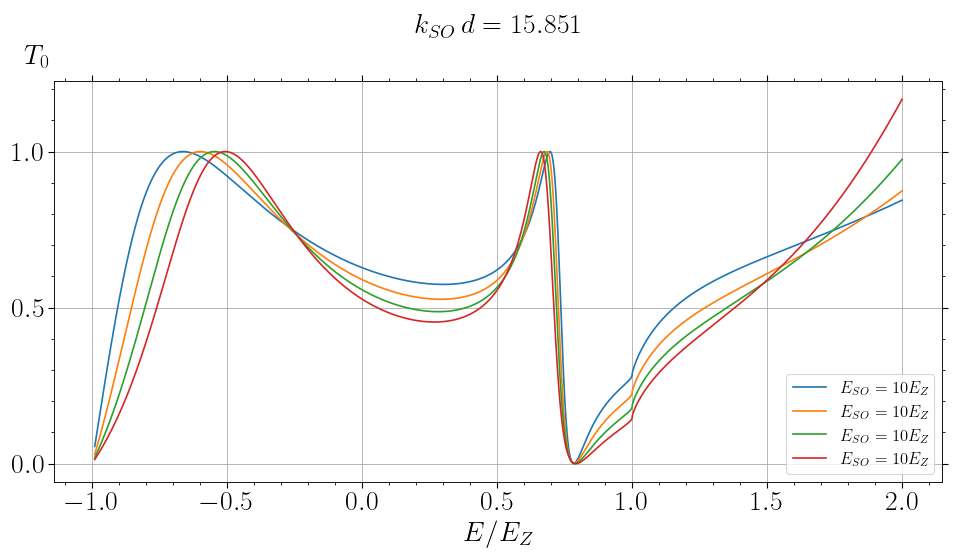

15.851
18.971
22.091
25.215


In [81]:
# %matplotlib inline

reload(plt)
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt


plt.rcParams['text.usetex'] = True

# fig, axs = plt.subplots(1, figsize=(14, 6), dpi=100, tight_layout=True, facecolor='white')
fig, axs = plt.subplots(1, figsize=(12, 7), dpi=100, tight_layout=True, facecolor='white')

k_list = list(trasmission_coeff_total.keys())
for k in k_list[5:10]:
    print(k[0])
    axs.plot(en, trasmission_coeff_total[k][0],
                   label=fr"$$ E_{{SO}} = {k[1]}  E_Z $$")

axs.grid()
axs.legend(fontsize = legend_font_size)
axs.set_xlabel(x_label[0], fontdict=font)
axs.set_ylabel(y_label[1], rotation=0, fontdict=font)
axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([.5])
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

plt.title(r"$k_{SO} \, d = "+f"{k_list[5][0]}$", 
              fontsize = 25, x=0.5, y=1.1)
    
if SAVE:
    plt.savefig(BASE_PATH+"Uniform_EZ_k=6kso(0|alpha|0).pdf", 
            transparent = False, 
            bbox_inches='tight')

plt.show()

<IPython.core.display.Javascript object>


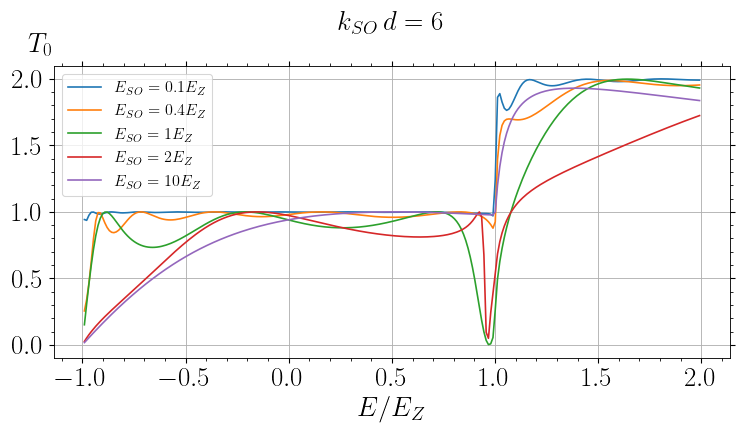

6
6
6
6
6


In [144]:
# %matplotlib inline

reload(plt)
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt


plt.rcParams['text.usetex'] = True

# fig, axs = plt.subplots(1, figsize=(14, 6), dpi=100, tight_layout=True, facecolor='white')
fig, axs = plt.subplots(1, figsize=(12, 7), dpi=100, tight_layout=True, facecolor='white')

k_list = list(trasmission_coeff_total.keys())
for k in k_list[10:]:
    print(k[0])
    axs.plot(en, trasmission_coeff_total[k][0],
                   label=fr"$$ E_{{SO}} = {k[1]}  E_Z $$")

axs.grid()
axs.legend(fontsize = legend_font_size)
axs.set_xlabel(x_label[0], fontdict=font)
axs.set_ylabel(y_label[1], rotation=0, fontdict=font)
axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([.5])
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

plt.title(r"$k_{SO} \, d = "+f"{k_list[10][0]}$", 
              fontsize = 25, x=0.5, y=1.1)
    
if SAVE:
    plt.savefig(BASE_PATH+"Uniform_EZ_k=6kso(0|alpha|0).pdf", 
            transparent = False, 
            bbox_inches='tight')

plt.show()

## Sánchez paper

In [1]:
D_SO = [6.4, 6.64, 6.88, 7.12]
D_Z = 12.8
D_Zcrit = 0.064


param = []
for eso in D_SO:
    param.append((eso, -eso**2/ (D_Z)))
    print(f"kso*d = {eso} Eso/EZ = {eso**2/ (D_Z):.2f}, Eso/EZ_crit = {eso**2/ (D_Zcrit):.2f}")
print(param)

kso*d = 6.4 Eso/EZ = 3.20, Eso/EZ_crit = 640.00
kso*d = 6.64 Eso/EZ = 3.44, Eso/EZ_crit = 688.90
kso*d = 6.88 Eso/EZ = 3.70, Eso/EZ_crit = 739.60
kso*d = 7.12 Eso/EZ = 3.96, Eso/EZ_crit = 792.10
[(6.4, -3.2000000000000006), (6.64, -3.4444999999999997), (6.88, -3.6979999999999995), (7.12, -3.9605)]


In [6]:
alp_r = -10
Eso_profile = [0, alp_r, 0]
x_profile = [0, 1]

junction = RashbaJunction2([x_profile, Eso_profile])


def g(x, par):
    junction[1] = par[1]
    junction.interface[0] = -par[0] / np.sqrt(np.abs(par[1]))/2
    junction.interface[1] = par[0] / np.sqrt(np.abs(par[1]))/2
    if x < -1 and np.abs(par[1]) < 0.5 or -np.abs(par[1])*(1+(1/(2*np.abs(par[1])))**2) > x:
        return np.nan
    else:
        S = junction.get_scattering_matrix(x)
        if not S.is_unitary:
            print(f"not unitary matrix length: x-> {x}, par-> {par}")
            return np.nan
        else:
            return S.t_coef

# param = [(6.4, 3.2000000000000006), (6.64, 3.4444999999999997), (6.88, 3.6979999999999995), (7.12, 3.9605)]

en = np.arange(-.99, 1, 0.011)
trasmission_coeff_total = make_grid(en, param, [g])#, gp])

# renormallize_result(trasmission_coeff_total, dy=7)

# SAVE = True
SAVE = False

<IPython.core.display.Javascript object>


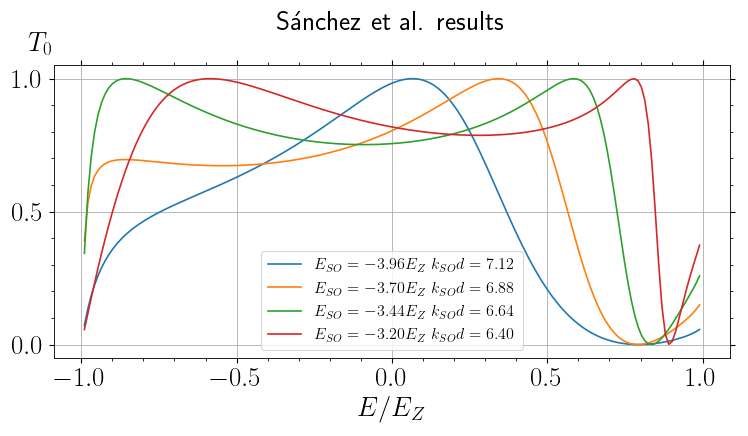

7.12
6.88
6.64
6.4


In [7]:
# %matplotlib inline


reload(plt)
# import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib notebook


plt.rcParams['text.usetex'] = True

# fig, axs = plt.subplots(1, figsize=(14, 6), dpi=100, tight_layout=True, facecolor='white')
fig, axs = plt.subplots(1, figsize=(12, 7), dpi=100, tight_layout=True, facecolor='white')

k_list = list(trasmission_coeff_total.keys())
for k in k_list[::-1]:
    print(k[0])
    axs.plot(en, trasmission_coeff_total[k][0],
                   label=fr"$$ E_{{SO}} = {k[1]:.2f}  E_Z \ k_{{SO}} d = {k[0]:.2f}$$")

axs.grid()
axs.legend(fontsize = legend_font_size)
axs.set_xlabel(x_label[0], fontdict=font)
axs.set_ylabel(y_label[1], rotation=0, fontdict=font)
axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([.5])
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

plt.title("Sánchez et al. results", 
              fontsize = 25, x=0.5, y=1.1)

# SAVE = True
SAVE = False
if SAVE:
    plt.savefig(BASE_PATH+"Sánchez et al. results.pdf", 
            transparent = False, 
            bbox_inches='tight')

plt.show()

## Potential well removed

In [101]:
class RashbaJunction_WithoutWell(RashbaJunction2):
    def __init__(self, *arg, **kwarg):
        super().__init__(*arg, **kwarg)
        self.conter_barier = 1

 
    def get_boundary_matrix(self, x, E, v=False):
        if self.E_so != 0:
            res = super().get_boundary_matrix(x, E - self.conter_barier, v)
        else:
            res = super().get_boundary_matrix(x, E, v)
        return res

In [143]:
alp_r = 10
Eso_profile = [0, alp_r, 0]
x_profile = [0, 1]

# junction = RashbaJunction2([x_profile, Eso_profile])
# junction = RashbaJunction_WithoutWell([x_profile, Eso_profile], logg=True, verbose=2)
junction = RashbaJunction_WithoutWell([x_profile, Eso_profile])


def g(x, par):
    junction.conter_barier = par[1]
#     junction[1] = par[1]
#     junction.interface[0] = -par[0] / np.sqrt(np.abs(par[1]))/2
#     junction.interface[1] = par[0] / np.sqrt(np.abs(par[1]))/2
    junction.interface[0] = -par[0] / np.sqrt(np.abs(alp_r))/2
    junction.interface[1] = par[0] / np.sqrt(np.abs(alp_r))/2
#     if x < -1 and np.abs(par[1]) < 0.5 or -np.abs(par[1])*(1+(1/(2*np.abs(par[1])))**2) > x:
#     if -np.abs(par[1])*((1/(2*np.abs(par[1])))**2)-5e-3 > x:
    if -np.abs(alp_r)*(1+ (1/(2*np.abs(alp_r)))**2)+5e-4 + par[1] > x:

        return np.nan
    else:
#         print(f"not unitary matrix length: x-> {x}, par-> {par}")
        S = junction.get_scattering_matrix(x)
        if not S.is_unitary:
            print(f"not unitary matrix length: x-> {x}, par-> {par}")
            return np.nan
        else:
            return S.t_coef

d = 0.3
# param = [(0.3, 0.1), (0.3, 0.4), (0.3, 1), (0.3, 2), (0.3, 10)]
param = [(d, 0), (d, alp_r/4), (d, alp_r/2), (d, 3*alp_r/4), (d, alp_r)]
en = np.arange(-0.99, 1.2, 0.00111)

trasmission_coeff_total = make_grid(en, param, [g])#, gp])

# renormallize_result(trasmission_coeff_total, dy=7)

# SAVE = True
SAVE = False

In [121]:
for p in param:
    print(f"D E_so = {p[1]}, E_min = {-alp_r*(1 + (1/2/alp_r)**2)}")
    print(f"E_min + D E_so = { -alp_r*(1+ (1/2/alp_r)**2) + p[1]}")
    print("__"*10)

D E_so = 0, E_min = -10.024999999999999
E_min + D E_so = -10.024999999999999
____________________
D E_so = 2.5, E_min = -10.024999999999999
E_min + D E_so = -7.524999999999999
____________________
D E_so = 5.0, E_min = -10.024999999999999
E_min + D E_so = -5.024999999999999
____________________
D E_so = 7.5, E_min = -10.024999999999999
E_min + D E_so = -2.5249999999999986
____________________
D E_so = 10, E_min = -10.024999999999999
E_min + D E_so = -0.02499999999999858
____________________


<IPython.core.display.Javascript object>


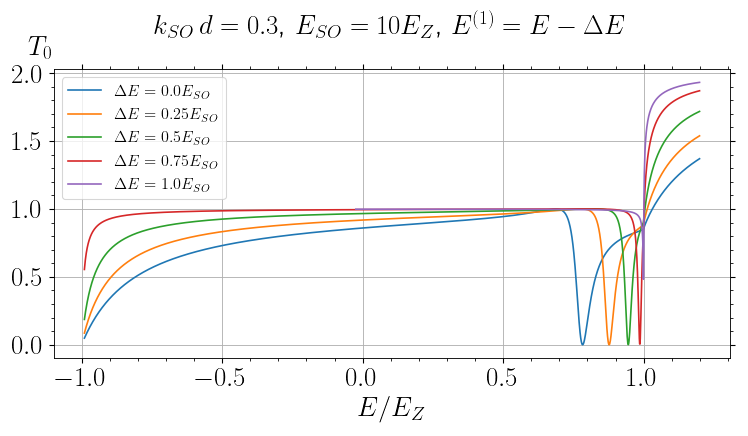

plots/paper_plots_2/Potential_well_removed_with_different_conter-barier.pdf


In [144]:
# %matplotlib inline

reload(plt)
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt


plt.rcParams['text.usetex'] = True

# fig, axs = plt.subplots(1, figsize=(14, 6), dpi=100, tight_layout=True, facecolor='white')
fig, axs = plt.subplots(1, figsize=(12, 7), dpi=100, tight_layout=True, facecolor='white')

k_list = list(trasmission_coeff_total.keys())
for k in k_list:
#     print(k[0])
    axs.plot(en, trasmission_coeff_total[k][0],
                   label=r"$$ \Delta E = "f"{k[1]/alp_r}"r"E_{SO}$$")

axs.grid()
axs.legend(fontsize = legend_font_size)
axs.set_xlabel(x_label[0], fontdict=font)
axs.set_ylabel(y_label[1], rotation=0, fontdict=font)

axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([.5])
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

plt.title("$k_{SO} \, d = "f"{k_list[0][0]}$"r", $E_{SO} ="f"{alp_r}"r"E_Z$, $E^{(1)} = E -\Delta E$", 
              fontsize = 25, x=0.5, y=1.1)


SAVE = True
# SAVE = False
if SAVE:
    print(BASE_PATH+f"Potential_well_removed_with_different_conter-barier.pdf")
    plt.savefig(BASE_PATH+f"Potential_well_removed_with_different_conter-barier.pdf", 
            transparent = False, 
            bbox_inches='tight')

plt.show()

## Wave function

In [23]:
ee = 0.783
al_r = 10

alpha = [0, al_r, 0]

phi = 0.3/ np.sqrt(np.abs(al_r))
# phi = 3.405/ np.sqrt(np.abs(al_r))

print(phi)

x_1 = -10
x_2 = - x_1
profile = [-phi/2, phi/2]
# profile = [0, phi]


junction = RashbaJunction2([profile, alpha], logg = False)
S = junction.get_scattering_matrix(ee)
M = junction.transfer_matrix_at(0, ee)


def t_region_WF(x, E, a = [1, 0]):
    # left part
    if x <= junction.interface[0]:
        junction.E_so = junction[0]
        wf = junction.get_WF(x, E)
        injected = a[0]*wf[:, 0]
        reflected = np.dot(S.C, np.array(a))[0]*wf[:, 1]
        evanescent = np.dot(S.C, np.array(a))[2]*wf[:, 2]
        res = injected + reflected + evanescent
    
    elif junction.interface[0] < x < junction.interface[1]:
        junction.E_so = junction[1]
        wf = junction.get_WF(x, E)
        
        coeff = np.dot(S.C, np.array(a))
        
        left_coeff = np.array([1, coeff[0], coeff[2], 0])
        
        res = np.dot(wf, np.dot(M, left_coeff))
        
#         if np.isclose(x, 0, atol = 1e-3):
#             print(np.dot(M, left_coeff))
    elif x > junction.interface[1]:
        junction.E_so = junction[2]    
        wf = junction.get_WF(x, E)

        injected = a[1]*wf[:, 1]
        reflected = np.dot(S.C, np.array(a))[1]*wf[:, 0]
        evanescent = np.dot(S.C, np.array(a))[3]*wf[:, 3]
        res = injected + reflected + evanescent
    return res

    
real_1 = []
imag_1 = []

real_2 = []
imag_2 = []

x_range = np.arange(x_1, x_2, 0.00011)

total_wf = np.zeros((len(x_range), 2), dtype = np.complex256)
# x_range = np.arange(-2.5, 2.5, 0.001)
j = 0
for xx in x_range:
    r = t_region_WF(xx, ee, a=[1,0])
    total_wf[j] = r
    real_1.append(r[0].real)
    real_2.append(r[1].real)
    
    imag_1.append(r[0].imag)
    imag_2.append(r[1].imag)
    j +=1

0.09486832980505137


plots/paper_plots_2/wavefunction/wavefunction_ksod=0.3,E=0.783EZ.pdf


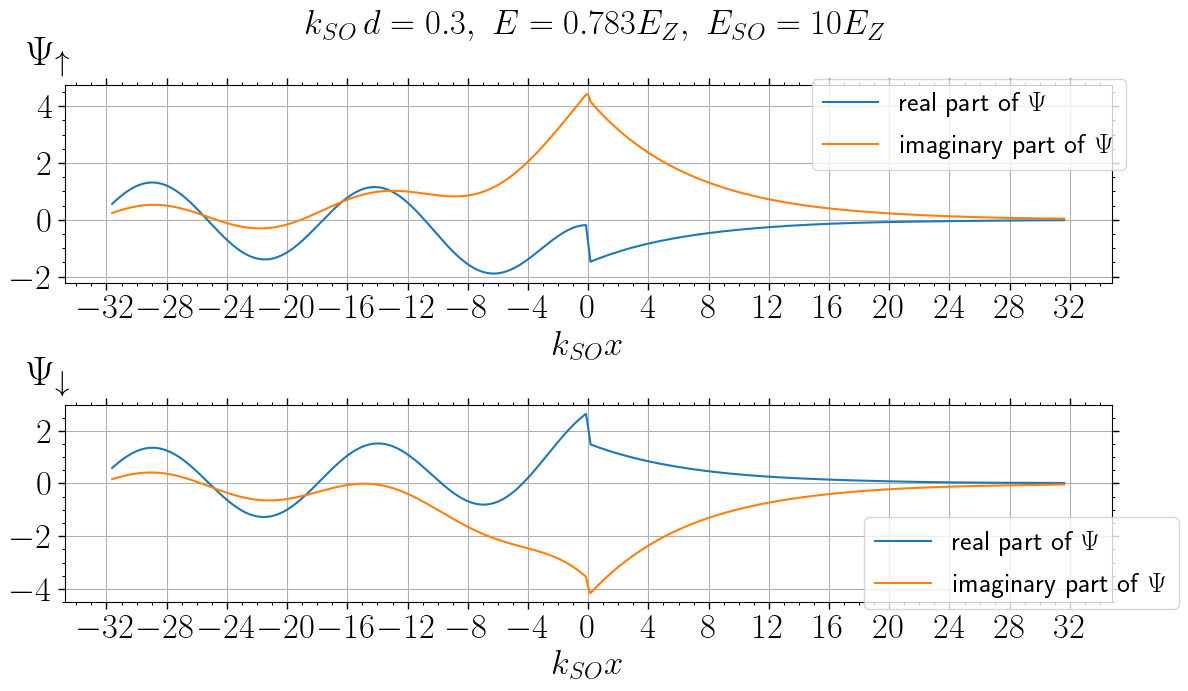

In [24]:
%matplotlib inline

# reload(plt)
# %matplotlib notebook
# %matplotlib notebook
# import matplotlib.pyplot as plt



plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(2, 1, figsize=(12, 7), dpi=100, tight_layout=True, facecolor='white')

labels_ = [r"real part of $\Psi$", 
           r"imaginary part of $\Psi$"]

axs[0].plot(x_range*np.sqrt(np.abs(al_r)), real_1, label=labels_[0])
axs[0].plot(x_range*np.sqrt(np.abs(al_r)), imag_1, label=labels_[1])

axs[1].plot(x_range*np.sqrt(np.abs(al_r)), real_2, label=labels_[0])
axs[1].plot(x_range*np.sqrt(np.abs(al_r)), imag_2, label= labels_[1])


# axs[0].plot(x_range, real_1, label=labels_[0])
# axs[0].plot(x_range, imag_1, label=labels_[1])

# axs[1].plot(x_range, real_2, label=labels_[0])
# axs[1].plot(x_range, imag_2, label= labels_[1])



x_magior = np.array([4, 4])
x_minor = np.array([1, 1])

y_magior = np.array([2, 2])
y_minor = np.array([0.5, 0.5])
# y_magior = np.array([1, 1])
# y_minor = np.array([0.25, 0.25])
adjuct_Tick(axs, x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font['size'])

anchor = [(0.7, 0.5), (0.75, 0.5)]
y_label_pos2 = [(-.016, 1.04), (-.016, 1.04)]
y_label2 = [r"$$\Psi_\uparrow$$", r"$$\Psi_\downarrow$$"]
for j, i in enumerate(axs):
    i.set_xlabel(r"$k_{SO} x$", fontdict=font)
    i.set_ylabel(y_label2[j], rotation=0, fontdict=font, fontsize= 30)
#     i.set_xlim(-5, 5)
    i.yaxis.set_label_coords(*y_label_pos2[j])
    
    i.legend(fontsize = 20, bbox_to_anchor=anchor[j])
    i.grid(True)

    
fig.suptitle(fr"$$k_{{SO}}\, d = {phi*np.sqrt(np.abs(al_r))}, \ E = {ee}E_Z, \ E_{{SO}} = {al_r}E_Z$$", fontsize=25)
# print(f"2 E_SO^(L)/E_Z= {2*Eso_profile[0]},  2E_SO^(R)/E_Z={2*(Eso_profile[1]+1E-4)},  E/E_Z = {ee}$$")

SAVE = True
# SAVE = False
if SAVE:
    print(BASE_PATH+"wavefunction/"+f"wavefunction_ksod={phi*np.sqrt(np.abs(al_r))},E={ee}EZ.pdf")
    plt.savefig(BASE_PATH+"wavefunction/"+f"wavefunction_ksod={phi*np.sqrt(np.abs(al_r))},E={ee}EZ.pdf", 
            transparent = False, 
            bbox_inches='tight')

plt.show()

## Density plot

In [148]:
alp_r = 3.7

Eso_profile = [0, alp_r, 0]

x_profile = [-1, 1]

junction = RashbaJunction2([x_profile, Eso_profile])


def g(ee, par):
    junction.interface = [0, par / np.sqrt(np.abs(alp_r))]
#     junction[1] = par[1]
    S = junction.get_scattering_matrix(ee)
    
#     junction.interface = [0, np.pi*np.sqrt(ee/E_l)]
#     S = junction.get_scattering_matrix(par/ee)
    
#     junction[0] = ee
#     junction[2] = -ee
#     S = junction.get_scattering_matrix(0)

    if not S.is_unitary:
        print(f"not unitary matrix length: {ee}, E_so: {par}")
        return np.nan
    else:
        return S.t_coef
    

x = np.arange(-.999, .999, 0.011)
y = np.arange(0.001, 10, 0.01)

res = make_grid(x, y, [g])

total_res = []

for i in res.keys():
    total_res.append(res[i][0])


total_res = np.array(total_res, dtype = np.float64)
print(total_res.shape)
print(x.shape)
print(y.shape)

# SAVE = True
SAVE = False

(1000, 182)
(182,)
(1000,)


<IPython.core.display.Javascript object>


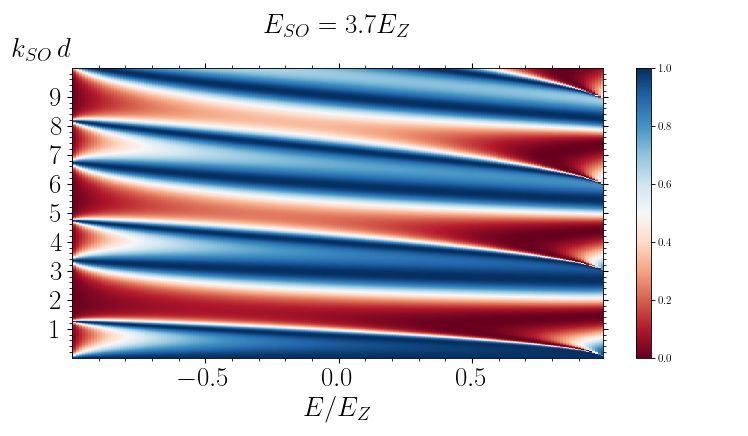

plots/paper_plots_2/Density_plots/Finite_nanowire_T_density_ESO=3.7EZ.pdf


In [150]:

reload(plt)
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True


fig, axs = plt.subplots(1, 
                        figsize=(12, 7),
                        dpi=100,
                        tight_layout=True,
                        facecolor='white')

z_min, z_max = total_res.min(), total_res.max()

c = axs.pcolormesh(x, y, total_res, cmap='RdBu', vmin=0, vmax=1, shading='auto')

axs.axis([x.min(), x.max(), y.min(), y.max()])

# c1 = axs[1].pcolormesh(x, y, total_res, cmap='RdBu', vmin=0, vmax=1, shading='auto')
# axs[1].axis([-.05, .05, y.min(), y.max()])

# axs.plot(x, np.full(len(x), 0.0631588608375565))



axs.set_xlabel(r"$E/E_Z$", fontdict=font)
axs.set_ylabel(r"$k_{SO}\, d$", loc = 'top', rotation=0, fontdict=font)
axs.yaxis.set_label_coords(0, 1.02)

    
    
x_magior = np.array([.5])
x_minor = np.array([0.1])

y_magior = np.array([1])
y_minor = np.array([0.2])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])
fig.colorbar(c1, ax=axs)

plt.title(r"$E_{SO} = "+f"{alp_r}"r"E_Z$", 
              fontsize = 25, x=0.5, y=1.1)
    
SAVE = True
# SAVE = False
if SAVE:
    print(BASE_PATH+"Density_plots/"+f"Finite_nanowire_T_density_ESO={alp_r}EZ.pdf")
    plt.savefig(BASE_PATH+"Density_plots/"+f"Finite_nanowire_T_density_ESO={alp_r}EZ.pdf",
            transparent = False, 
            bbox_inches='tight')
plt.show()
#6.88

# Base Nanowire

In [158]:
alp_r = -10
Eso_profile = [0, alp_r, 0]
EZ_profile = [.5, 1, .5]
x_profile = [0, 1]
D_EZ = np.abs(EZ_profile[0] - EZ_profile[1])

junction = RashbaJunction2([x_profile, Eso_profile, EZ_profile], logg=True, verbose=1)


def g(x, par):
    junction[1] = par[1]
#     junction.interface[0] = -par[0]/(2*np.sqrt(D_EZ))
#     junction.interface[1] = par[0]/(2*np.sqrt(D_EZ))
    junction.interface[0] = -par[0]/(2*np.sqrt(par[0]))
    junction.interface[1] = par[0]/(2*np.sqrt(par[0]))

    if x < -1 and np.abs(par[1]) < 0.5 or -np.abs(par[1])*(1+(1/(2*np.abs(par[1])))**2) > x:
        return np.nan
    else:
        S = junction.get_scattering_matrix(x)
        if not S.is_unitary:
            print(f"not unitary matrix length: x-> {x}, par-> {par}")
            return np.array([np.nan, np.nan])
        else:
            return S.t_coef



param = [(0.3, 0.01), (0.3, 0.4), (0.3, 10), 
         (1, 0.01), (1, 0.4), (1, 10),
        (6, 0.01), (6, 0.4), (6, 10)]

en = np.arange(-min(EZ_profile)+.0001, 2, 0.0011)
trasmission_coeff_total = make_grid(en, param, [g])#, gp])
# SAFE = True
SAFE = False

# renormallize_result(trasmission_coeff_total, dy=7)

WARNING - Use dimensional energy [meV] and length scale sqrt(2 m /hbar^2)[nm]
WARNING - Use dimensional energy [meV] and length scale sqrt(2 m /hbar^2)[nm]


0.3
0.3
0.3


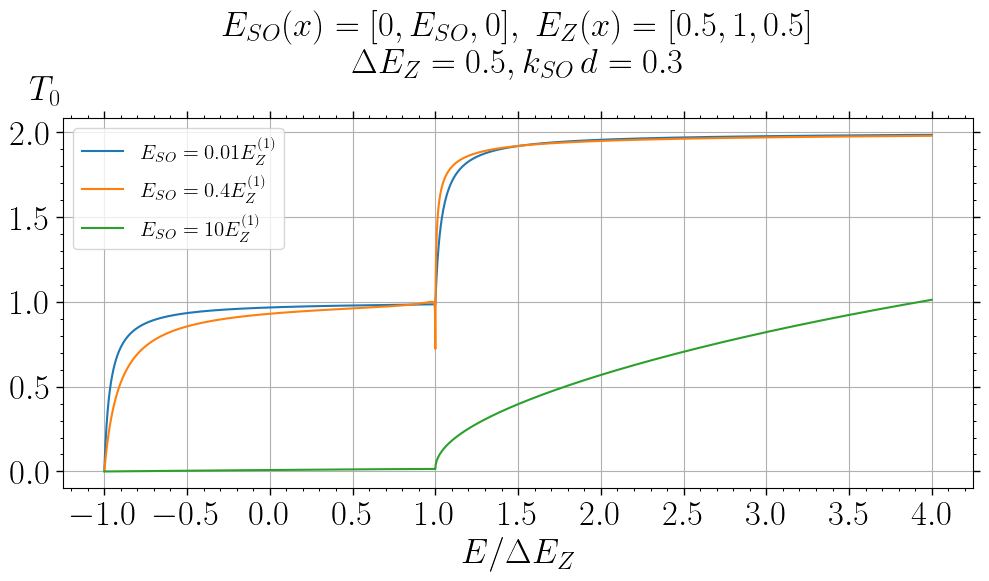

In [159]:
%matplotlib inline
# %matplotlib notebook

plt.rcParams['text.usetex'] = True

# fig, axs = plt.subplots(1, figsize=(14, 6), dpi=100, tight_layout=True, facecolor='white')
fig, axs = plt.subplots(1, figsize=(10, 6), dpi=100, tight_layout=True, facecolor='white')

k_list = list(trasmission_coeff_total.keys())
for k in k_list[0:3]:
    print(k[0])
    axs.plot(en/D_EZ, trasmission_coeff_total[k][0],
                   label=fr"$$ E_{{SO}} = {k[1]}  E_Z^{{(1)}} $$")

axs.grid()
axs.legend(fontsize = legend_font_size)
axs.set_xlabel(x_label[1], fontdict=font)
axs.set_ylabel(y_label[1], rotation=0, fontdict=font)
axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([.5])
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

plt.title(r"$E_{SO}(x) = [0, E_{SO}, 0], \ E_Z(x) = "+f"{EZ_profile}$ \n"
              +r"$\Delta E_Z = "+f"{D_EZ},"
              +r"k_{SO} \, d = "+f"{k_list[0][0]}$", 
              fontsize = 25, x=0.5, y=1.1)
    
if SAFE:
    plt.savefig(BASE_PATH+"1_T(E)_for_k=03kso(0|alpha|0).pdf", 
            transparent = False, 
            bbox_inches='tight')

plt.show()

1
1
1


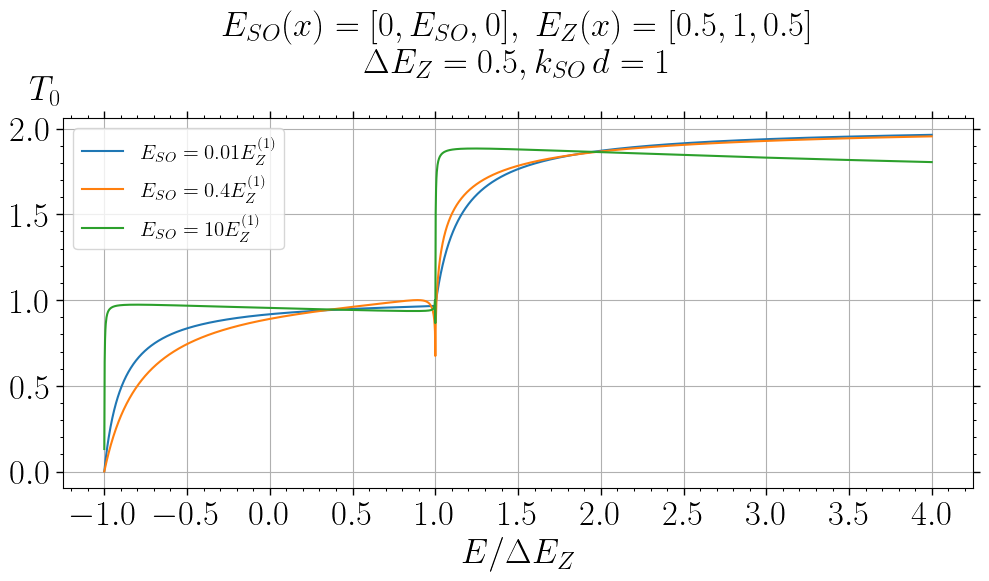

In [112]:
%matplotlib inline

# %matplotlib notebook

plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 6), dpi=100, tight_layout=True, facecolor='white')
# fig, axs = plt.subplots(1, figsize=(14, 6), dpi=100, tight_layout=True, facecolor='white')


k_list = list(trasmission_coeff_total.keys())
for k in k_list[3:6]:
    print(k[0])
    axs.plot(en/D_EZ, trasmission_coeff_total[k][0],
                   label=fr"$$ E_{{SO}} = {k[1]} E_Z^{{(1)}}$$")

axs.grid()
axs.legend(fontsize = legend_font_size)
axs.set_xlabel(x_label[1], fontdict=font)
axs.set_ylabel(y_label[1], rotation=0, fontdict=font)
axs.yaxis.set_label_coords(*y_label_pos[0])
# axs.yaxis.set_label_coords(-.04, 1)


x_magior = np.array([.5])
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

plt.title(r"$E_{SO}(x) = [0, E_{SO}, 0], \ E_Z(x) = "+f"{EZ_profile}$ \n"
              +r"$\Delta E_Z = "+f"{D_EZ},"
              +r"k_{SO} \, d = "+f"{k_list[3][0]}$",
              fontsize = 25, x=0.5, y=1.1)

if SAFE:
    plt.savefig(BASE_PATH+"1_T(E)_for_k=kso(0|alpha|0).pdf", 
            transparent = False, 
            bbox_inches='tight')
plt.show()

6
6
6


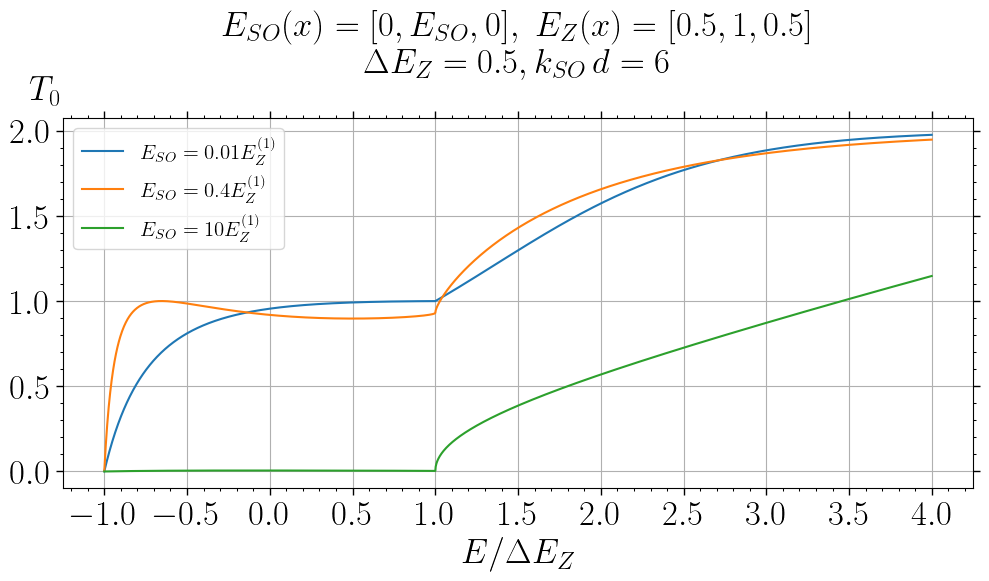

In [113]:
%matplotlib inline
# %matplotlib notebook

plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 6), dpi=100, tight_layout=True, facecolor='white')
# fig, axs = plt.subplots(1, figsize=(14, 6), dpi=100, tight_layout=True, facecolor='white')


k_list = list(trasmission_coeff_total.keys())
for k in k_list[6:]:
    print(k[0])
    axs.plot(en/D_EZ, trasmission_coeff_total[k][0],
                   label=fr"$$ E_{{SO}} = {k[1]} E_Z^{{(1)}}$$")

axs.grid()
axs.legend(fontsize = legend_font_size)
axs.set_xlabel(x_label[1], fontdict=font)
axs.set_ylabel(y_label[1], rotation=0, fontdict=font)
axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([.5])
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

plt.title(r"$E_{SO}(x) = [0, E_{SO}, 0], \ E_Z(x) = "+f"{EZ_profile}$ \n"
              +r"$\Delta E_Z = "+f"{D_EZ},"
              +r"k_{SO} \, d = "+f"{k_list[6][0]}$",
              fontsize = 25, x=0.5, y=1.1)
if SAFE:
    plt.savefig(BASE_PATH+"1_T(E)_for_k=6kso(0|alpha|0).pdf", 
            transparent = False, 
            bbox_inches='tight')
plt.show()

# Long NW for different profiles $E_Z$

In [156]:
alp_r = 10
Eso_profile = [0, alp_r, 0]
EZ_profile = [.5, 1, .5]
ksod = 6/2/np.sqrt(EZ_profile[1]*alp_r)
x_profile = [-ksod, ksod]
print(x_profile)
D_EZ = np.abs(EZ_profile[0] - EZ_profile[1])

junction = RashbaJunction2([x_profile, Eso_profile, EZ_profile], logg=True, verbose=1)


def g(x, par):
    junction.E_z_profile[0] = par
    junction.E_z_profile[-1] = par

#     if x < -1 and np.abs(par[1]) < 0.5 or -np.abs(par[1])*(1+(1/(2*np.abs(par[1])))**2) > x:
    if x < - par:
        return np.nan
    else:
        S = junction.get_scattering_matrix(x)
        if not S.is_unitary:
            print(f"not unitary matrix length: x-> {x}, par-> {par}")
            return np.nan
        else:
            return S.t_coef



param = [1, 0.5, 0.2, 0.05]

en = np.arange(-1+.0001, 2, 0.0011)
trasmission_coeff_total = make_grid(en, param, [g])#, gp])
# SAFE = True
SAFE = False

# renormallize_result(trasmission_coeff_total, dy=7)

[-0.9486832980505138, 0.9486832980505138]
WARNING - Use dimensional energy [meV] and length scale sqrt(2 m /hbar^2)[nm]
WARNING - Use dimensional energy [meV] and length scale sqrt(2 m /hbar^2)[nm]


1
0.5
0.2
0.05


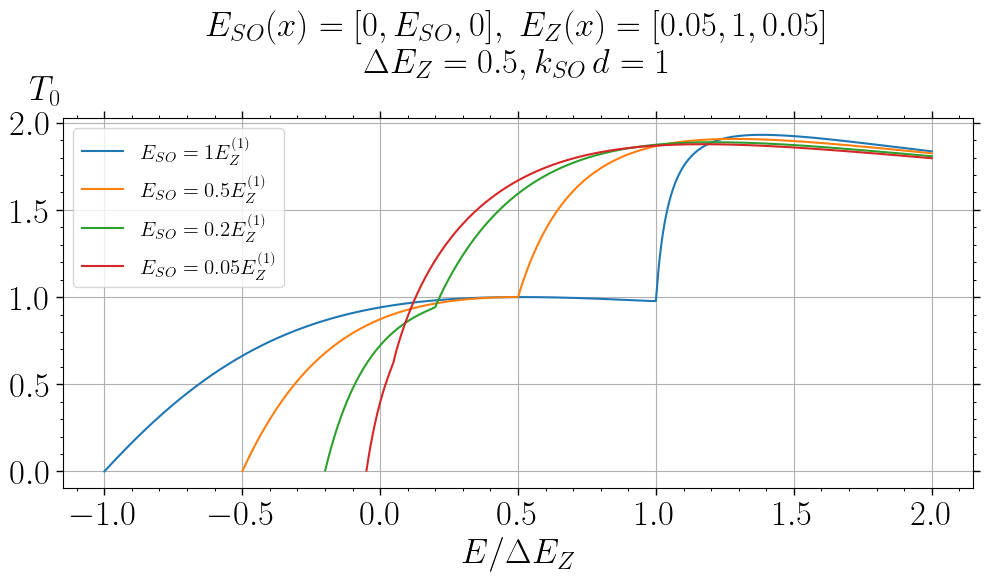

In [157]:
%matplotlib inline
# %matplotlib notebook

plt.rcParams['text.usetex'] = True

# fig, axs = plt.subplots(1, figsize=(14, 6), dpi=100, tight_layout=True, facecolor='white')
fig, axs = plt.subplots(1, figsize=(10, 6), dpi=100, tight_layout=True, facecolor='white')

k_list = list(trasmission_coeff_total.keys())
for k in k_list:
    print(k)
    axs.plot(en/EZ_profile[1], trasmission_coeff_total[k][0],
                   label=fr"$$ E_{{SO}} = {k}  E_Z^{{(1)}} $$")

axs.grid()
axs.legend(fontsize = legend_font_size)
axs.set_xlabel(x_label[1], fontdict=font)
axs.set_ylabel(y_label[1], rotation=0, fontdict=font)
axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([.5])
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

plt.title(r"$E_{SO}(x) = [0, E_{SO}, 0], \ E_Z(x) = "+f"{EZ_profile}$ \n"
              +r"$\Delta E_Z = "+f"{D_EZ},"
              +r"k_{SO} \, d = "+f"{k_list[0]}$", 
              fontsize = 25, x=0.5, y=1.1)
    
if SAFE:
    plt.savefig(BASE_PATH+"1_T(E)_for_k=03kso(0|alpha|0).pdf", 
            transparent = False, 
            bbox_inches='tight')

plt.show()

# Vanishing E_{SO}

In [89]:
alp_r = 0
Eso_profile = [0, alp_r, 0]
EZ_profile = [.05, 1, .05]
# EZ_profile = [.5, 1, .5] 
D_EZ = np.abs(EZ_profile[0] - EZ_profile[1])
x_profile = [0, 1]


junction = RashbaJunction2([x_profile, Eso_profile, EZ_profile], logg=True, verbose=1)


def g(x, par):
    junction[1] = par[1]
    junction.interface[0] = -par[0]/(2*np.sqrt(D_EZ))
    junction.interface[1] = par[0]/(2*np.sqrt(D_EZ))

    if x < -1 and np.abs(par[1]) < 0.5 or -np.abs(par[1])*(1+(1/(2*np.abs(par[1])))**2) > x:
        return np.nan
    else:
        S = junction.get_scattering_matrix(x)
        if not S.is_unitary:
            print(f"not unitary matrix length: x-> {x}, par-> {par}")
            return np.array([np.nan, np.nan])
        else:
            return S.t_coef
    

param = [(0.3, 0+1e-10), (1, 0+1e-10), (6, 0+1e-10)]

en = np.arange(-min(EZ_profile)+.0001, 2, 0.0011)
trasmission_coeff_total = make_grid(en, param, [g])#, gp])

# renormallize_result(trasmission_coeff_total, dy=7)

WARNING - Use dimensional energy [meV] and length scale sqrt(2 m /hbar^2)[nm]
WARNING - Use dimensional energy [meV] and length scale sqrt(2 m /hbar^2)[nm]


In [90]:
def T_tot(E, d, E_zl, dE_z):
    dE_zl = E_zl/dE_z
    x1 = E - dE_zl
    x2 = E + dE_zl
    
    k0 = np.sqrt(x2)
    k1 = np.sqrt(x2 + 1)
    k2 = np.sqrt(np.abs(x1 - 1))
    
    T_1 = 0.0
    T_2 = 0.0
    if 0<x1<1:
        T_1 = 1/(1+np.sinh(d*k2)**2/(4*x1*(1-x1)))
    elif x1 > 1:
        T_1 = 1/(1+np.sin(d*k2)**2/(4*x1*(x1-1)))
        
    T_2 = 4* (k0*k1)**2/(4*(k0*k1)**2 * np.cos(d*k1)**2 + (k1**2 + k0**2)**2*np.sin(d*k1)**2)
    return T_1 + T_2
    

0.3
1
6


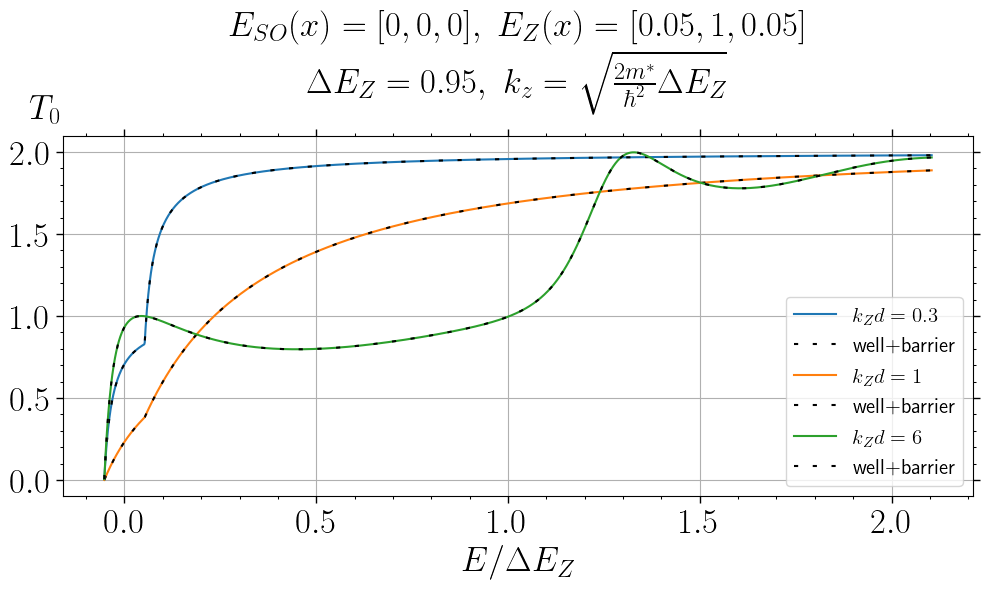

In [91]:
%matplotlib inline

# %matplotlib notebook
# %matplotlib notebook

plt.rcParams['text.usetex'] = True

# fig, axs = plt.subplots(1, figsize=(14, 6), dpi=100, tight_layout=True, facecolor='white')
fig, axs = plt.subplots(1, figsize=(10, 6), dpi=100, tight_layout=True, facecolor='white')

k_list = list(trasmission_coeff_total.keys())
for k in k_list:
    print(k[0])
    axs.plot(en/D_EZ, trasmission_coeff_total[k][0],
                   label=fr"$$ k_{{Z}} d = {k[0]}$$")
    axs.plot(en/D_EZ, [T_tot(e, k[0], EZ_profile[0], D_EZ) for e in en/D_EZ],
                   label="well+barrier", linestyle=(0, (2, 7)), color='black')
#     


axs.grid()
axs.legend(fontsize = legend_font_size)
axs.set_xlabel(r"$$E / \Delta E_Z $$", fontdict=font)
axs.set_ylabel(r"$T_0$", rotation=0, fontdict=font)
axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([.5])
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

plt.title(r"$E_{SO}(x) = [0, 0, 0], \ E_Z(x) = "+f"{EZ_profile}$ \n"
              +r"$\Delta E_Z = "+f"{D_EZ}, \ "r"k_{z} = \sqrt{\frac{2m^*}{\hbar^2} \Delta E_{Z}}$", 
              fontsize = 25, x=0.5, y=1.1)
plt.savefig(BASE_PATH+"Inhomogeneous_E_Z-only.pdf", 
            transparent = False, 
            bbox_inches='tight')

plt.show()